# Earth Tunnel

In [15]:
# imports
import numpy as np
from astropy import units
from astropy import constants

from matplotlib import pyplot as plt

# We will assume the Earth has a constant density $\rho_\oplus$

## We calculate this as follows:

## $M_\oplus = \frac{4}{3} \pi R_\oplus^3 \rho_\oplus$

## where, $M_\oplus = 5.97 10^{24} \, \rm kg$ is the mass of the Earth and $R_\oplus = 6378 \, \rm km$ is the radius of the Earth

## Therefore, 

## $\rho_\oplus = \frac{3}{4\pi} \frac{M_\oplus}{R_\oplus^3}$

## Let's calculate that

In [6]:
rho_E = 3/(4*np.pi) * units.Mearth / units.Rearth**3
rho_E.to('g/cm^3')

<Quantity 5.49502187 g / cm3>

## Wow, that makes Earth 5x denser than water!

----

# Now let's fuss with velocity

##  I like deriving this from conservation of Energy

##  We will equate change in kinetic energy with change in potential energy $\Phi$

## As we discussed at Peter's house, thanks to Gauss' Law (aka the Newton shell), we know the force on a mass at radius $R$ is given by the enclosed mass $M_{enc}$:

## $F(R) = \frac{G M_{\rm enc}(R)}{R^2}$

## where

## $M_{\rm enc}(R) = \frac{4}{3} \pi R^3 \rho_\oplus$

## Ok, the change in potential energy $d\Phi$ by displacing a mass $dR$ under the influence of a force $F(R)$ is given by:

## $d\Phi = F(R) dR$

## If we intergrate from the Earth's surface $R = R_\oplus$ to some interior radius, we have:

## $\Delta \Phi(R) = \Phi(R) - \Phi(R_\oplus) = - \int_{R_\oplus}^R \frac{G M_{\rm enc}}{R^2} dR$

## $\Delta \Phi(R) = -\int_{R_\oplus}^R \frac{4 G \rho_\oplus \pi R^3}{3 R^2} dR$

## $\Delta \Phi(R) = -\frac{4\pi G \rho_\oplus}{3} \int_{R_\oplus}^R R dR$

## $\Delta \Phi(R) = \frac{2\pi G \rho_\oplus}{3} (R_\oplus^2 - R^2)$

## Now we equate to the change in K.E. = $v^2 / 2$

## Note, I haven't bothered to express the mass of our object; it cancels out (all objects fall with the same acceleration)!

## We finish with:

## $v(R)^2 = 2 \Delta \Phi(R)$

## $v(R) =  (\frac{4\pi G \rho_\oplus}{3})^{1/2} \; (R_\oplus^2 - R^2)^{1/2}$

## Let's calculate that!

In [61]:
def v(R):
    v = np.sqrt(4*np.pi*constants.G*rho_E / 3) * np.sqrt(1*units.Rearth**2 - R**2)
    return v

In [62]:
v(1*units.Rearth).to('m/s'), v(0*units.Rearth).to('m/s')

(<Quantity 0. m / s>, <Quantity 7905.38823439 m / s>)

## Well, that's a bit fast at the center:  Approximately 8km/s

## Let's plot it

In [63]:
Rs = np.linspace(0,1,10000) * units.Rearth
vs = v(Rs).to('km/s')

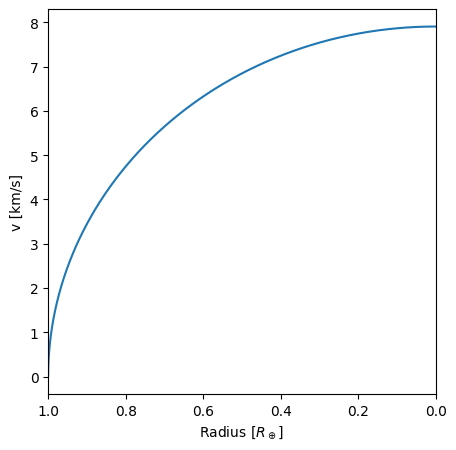

In [64]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(Rs, vs)
ax.set_xlim(1.,0)
#
ax.set_xlabel(r"Radius [$R_\oplus$]")
ax.set_ylabel("v [km/s]")
#
plt.show()

## As anticipated, our acceleration is greatest at the start when we have the full Earth's mass below us, and the acceleration tends to 0 as we approach the center of the Earth

----

# Ok, it is time time.

## We know that:

## $dR = v(R) dt$

## Or, $dt = dR / v(R)$

## I will do this numerically, but provide the exact solution below with a bit of Calculus that I finally nailed on the airplane :)

## We split up the Earth's radius into 10000 equal steps $\delta R$ (and to avoid an unpleasant infinity, calculate at the center of each step)

## $\delta R = R_\oplus / 10000 \approx 0.6378 \, \rm km$

In [65]:
Delta_R = 1*units.Rearth / 10000
Delta_R.to('km')

Rs = np.arange(10000)*units.Rearth/10000 + Delta_R/2. 
Rs = np.flip(Rs)

In [66]:
Rs[0], Rs[-1]

(<Quantity 0.99995 earthRad>, <Quantity 5.e-05 earthRad>)

## Calculate $\delta t = \delta R / v(R)$

In [67]:
def dt(R):
    return Delta_R / v(R) 

In [68]:
dts = dt(Rs)

## Add em up!

In [69]:
t_total = np.sum(dts)
t_total.to('s')

<Quantity 1263.87407033 s>

## Well, that's rather fast!  Approximately 20min

## Let's plot it

In [70]:
t_cum = np.cumsum(dts).to('s')

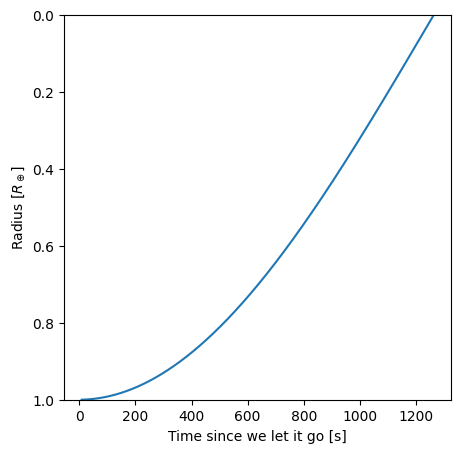

In [71]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(t_cum, Rs)
ax.set_ylim(1.,0)
#
ax.set_ylabel(r"Radius [$R_\oplus$]")
ax.set_xlabel("Time since we let it go [s]")
#
plt.show()

# Those of you who have been following along, will astutely note that the round trip will be 4 times 20min or $\approx 80$min

## And you might know that a satellite in orbit takes $\approx 90$min to go around

## Well, maybe if I weren't so tired last night, I would have intuited the Earth tunnel solution from my knowledge of satellites.

## You see, the satellite is in free fall (you know it has no engine).  

## So, the only real difference between it and our Earth tunnel is that it has to circle the Earth.  But wait, you say, them satellites are moving fast!  Yes, but *all* of that speed is horizontal.  

## They are yo-yoin'g just like our solid waste!   And the time is *identical*!!

## Ok, that leaves the reader with an exercise:  

## Why did we calculate only 80min and not 90min?!

----

# Let's do the Integral for the time calculation, remembering:

## $dt = dR / v(R)$

## and

## $v(R) =  (\frac{4\pi G \rho_\oplus}{3})^{1/2} \; (R_\oplus^2 - R^2)^{1/2}$

## We integrate from time 0 to $t$ where $t$ is when we reach the center where $R = 0$ and $t=0$ corresponds to $R = R_\oplus$

## $t = \int dR / v(R)$

## $t = (\frac{4\pi G \rho_\oplus}{3})^{-1/2} \; \int (R_\oplus^2 - R^2)^{-1/2} dR$

## Well, that looks a tad narly.  But I am sure you remember your trig substitutions.

## Let $R = R_\oplus \sin\theta$

## This means

## $dR = R_\oplus \cos\theta d\theta$

## Plug in:

##  $\int (R_\oplus^2 - R^2)^{-1/2} dR = R_\oplus \int (1 - \sin^2\theta)^{-1/2} \, \cos\theta d\theta$

## And we all remember that $\cos^2\theta + \sin^2\theta = 1$, so:

##  $\int (R_\oplus^2 - R^2)^{-1/2} dR = \int (\cos\theta)^{-1} \, \cos\theta d\theta = \int d\theta$

## Note that our $R_\oplus$ "disappeared"!

## And, well, that's rather simple!  But what do we integrate over (i.e. which values of $\theta$?

## I leave it to the reader to agree we go from 0 to $\pi/2$

## Altogether now:


## $t = \frac{\pi}{2} \sqrt{\frac{4\pi G \rho_\oplus}{3}}$

## Let's evaluate that

In [86]:
tt = (np.pi / 2) / np.sqrt(4*np.pi * constants.G * rho_E / 3)
tt.decompose()
#tt.to('s')

<Quantity 1267.32498834 s>

## So our numerical "integration" was accurate to $\approx 4$s or better than 0.1%